In [65]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

In [66]:
a = 3
b = 3
z = a + b*1j
print('z =', z6)
print('The type of the variable is', type(z))

z = (3+3j)
The type of the variable is <class 'complex'>


In [67]:
z1 = 2.75 + 3.69j
z2 = 8.55 - 6.13j
z3 = z1 * z2
print('z3 =', z3)

z3 = (46.1322+14.692000000000004j)


In [68]:
z4 = 1.4 * numpy.exp(5.32*1j)

print('z4 = ', z4)

z4 =  (0.799270785858-1.1494199454j)


In [69]:
z5 = (7.51-9.15j)/(4.43+9.64j)
print('z5 = ', z5)

z5 =  (-0.4880897698448308-1.0033441577191493j)


## 2. Shapes created by the Joukowski transformation

In [70]:
N = 200
R = 1.5
theta = numpy.linspace(0, 2*math.pi, N)
x = R*numpy.cos(theta)
y = R*numpy.sin(theta)

In [71]:
def get_E(x, y):
    z = x + y*1j
    E = z + c**2/z
    
    return E

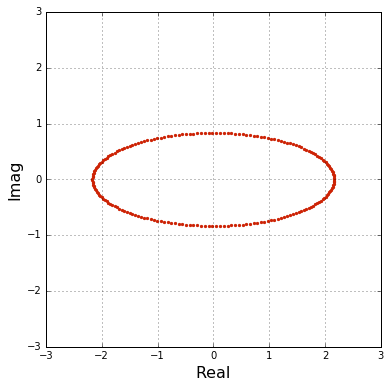

In [72]:
# 2.1
c = 1
R = 1.5
x_c, y_c = 0.0, 0.0
E_1 = get_E(x, y)
pyplot.figure(figsize=(6, 6))
pyplot.grid(True)
pyplot.xlabel('Real', fontsize=16)
pyplot.ylabel('Imag', fontsize=16)
pyplot.xlim(-3.0, 3.0)
pyplot.ylim(-3.0, 3.0)
pyplot.scatter(E_1.real, E_1.imag, color='#CD2305', s=5, marker='o')

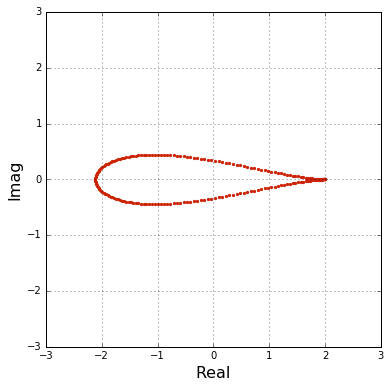

In [73]:
# 2.2
c = 1
R_2 = 1.2
x_2 = R_2*numpy.cos(theta)+(c-R_2)
y_2 = R_2*numpy.sin(theta)
E_2 = get_E(x_2, y_2)
pyplot.figure(figsize=(6, 6))
pyplot.grid(True)
pyplot.xlabel('Real', fontsize=16)
pyplot.ylabel('Imag', fontsize=16)
pyplot.xlim(-3.0, 3.0)
pyplot.ylim(-3.0, 3.0)
pyplot.scatter(E_2.real, E_2.imag, color='#CD2305', s=5, marker='o')

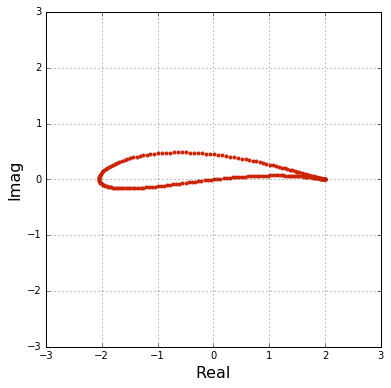

In [74]:
# 2.3
c = 1
deta_x, deta_y = 0.1, 0.1
R_3 = ((c-deta_x)**2 + deta_y**2)**0.5
x_3 = R_3*numpy.cos(theta)+deta_x
y_3 = R_3*numpy.sin(theta)+deta_y
E_3 = get_E(x_3, y_3)
size = 6
pyplot.figure(figsize=(size, size))
pyplot.grid(True)
pyplot.xlabel('Real', fontsize=16)
pyplot.ylabel('Imag', fontsize=16)
pyplot.xlim(-3.0, 3.0)
pyplot.ylim(-3.0, 3.0)
pyplot.scatter(E_3.real, E_3.imag, color='#CD2305', s=9, marker='o')

## 3. Grid points on the $z$-plane using polar coordinates

In [75]:
N_r = 100
N_theta = 145
c = 1
R = 1.15
x_c, y_c = -0.15, 0.0
r = numpy.linspace(R, 5, N_r)
theta = numpy.linspace(0, 2*math.pi, N_theta)
R_r, T_theta = numpy.meshgrid(r, theta)
z_x = R_r*numpy.cos(T_theta)+x_c
z_y = R_r*numpy.sin(T_theta)+y_c

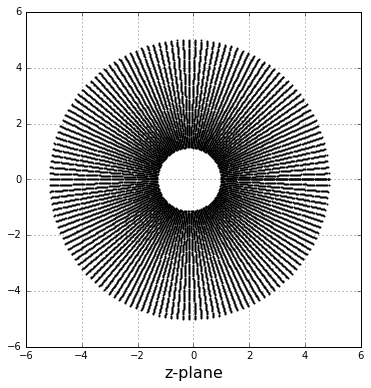

In [76]:
# plot a grid on the z-plane
size = 6
pyplot.figure(figsize=(size, size))
pyplot.grid(True)
pyplot.xlabel('z-plane', fontsize=16)
pyplot.xlim(-6.0, 6.0)
pyplot.ylim(-6.0, 6.0)
pyplot.scatter(z_x, z_y , color='k', s=4, marker='o', linewidth=0)

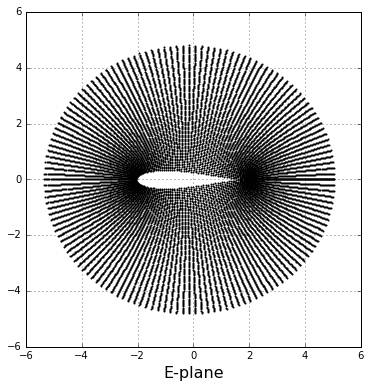

In [77]:
E_4 = get_E(z_x, z_y)
size = 6
pyplot.figure(figsize=(size, size))
pyplot.grid(True)
pyplot.xlabel('E-plane', fontsize=16)
pyplot.xlim(-6.0, 6.0)
pyplot.ylim(-6.0, 6.0)
pyplot.scatter(E_4.real, E_4.imag, color='k', s=4, marker='o', linewidth=0)